In [10]:
#!pip install mip
from gurobipy import *
import numpy as np
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import poisson
import math
from itertools import product
from mip import Model, BINARY
import matplotlib.patches as mpatches



# Pregunta 1a

In [11]:
p1 = 150  
p2 = 70  
media_demanda_alta = 40
varianza_demanda_alta = 10
std_demanda_alta = np.sqrt(varianza_demanda_alta)
num_habitaciones = 100
N = 2000 

q = 1 - (p2 / p1)

y1_optimo = norm.ppf(q, loc=media_demanda_alta, scale=std_demanda_alta)
y1_optimo = math.ceil(y1_optimo)


ingreso_total = []
vendidas_tarifa_alta = []
vendidas_tarifa_baja = []
overstock_tarifa_alta = []
understock_tarifa_alta = []

for i in range(N):
    demanda_alta = np.random.normal(media_demanda_alta, std_demanda_alta)

    demanda_alta = max(0, min(demanda_alta, num_habitaciones))
    
    vendidas_alta = min(demanda_alta, y1_optimo)
    vendidas_alta = math.ceil(vendidas_alta)
    
    vendidas_baja = num_habitaciones - vendidas_alta
    vendidas_baja = math.ceil(vendidas_baja)
    
    ingreso = vendidas_alta * p1 + vendidas_baja * p2
    
    overstock = max(0, y1_optimo - demanda_alta)
    understock = max(0, demanda_alta - y1_optimo)
    
    ingreso_total.append(ingreso)
    vendidas_tarifa_alta.append(vendidas_alta)
    vendidas_tarifa_baja.append(vendidas_baja)
    overstock_tarifa_alta.append(overstock)
    understock_tarifa_alta.append(understock)

promedio_ingreso_total = np.mean(ingreso_total)
promedio_vendidas_tarifa_alta = np.mean(vendidas_tarifa_alta)
promedio_vendidas_tarifa_alta = math.ceil(promedio_vendidas_tarifa_alta)
promedio_vendidas_tarifa_baja = np.mean(vendidas_tarifa_baja)
promedio_vendidas_tarifa_baja = math.ceil(promedio_vendidas_tarifa_baja)
promedio_overstock = np.mean(overstock_tarifa_alta)
promedio_overstock = math.ceil(promedio_overstock)
promedio_understock = np.mean(understock_tarifa_alta)
promedio_understock = math.ceil(promedio_understock)

print(f"Cantidad promedio demanda alta", y1_optimo)
print(f"Promedio de ingreso total:", promedio_ingreso_total)
print(f"Promedio de habitaciones vendidas con tarifa alta:", promedio_vendidas_tarifa_alta)
print(f"Promedio de habitaciones vendidas con tarifa baja:", promedio_vendidas_tarifa_baja)
print(f"Promedio de overstock (habitaciones que sobraron):", promedio_overstock)
print(f"Promedio de understock (habitaciones que faltaron):", promedio_understock)


Cantidad promedio demanda alta 41
Promedio de ingreso total: 10156.4
Promedio de habitaciones vendidas con tarifa alta: 40
Promedio de habitaciones vendidas con tarifa baja: 61
Promedio de overstock (habitaciones que sobraron): 2
Promedio de understock (habitaciones que faltaron): 1


# Pregunta 1b

In [12]:
# Parámetros del problema
p1 = 150  # Precio tarifa alta
p2 = 70   # Precio tarifa baja
media_demanda_alta = 40
varianza_demanda_alta = 10
std_dev_demanda_alta = np.sqrt(varianza_demanda_alta)
num_habitaciones = 100
N = 2000  # Número de simulaciones

# Calcular el percentil a partir de la regla de Littlewood
q = 1 - (p2 / p1)

# Usar la inversa de la distribución normal acumulada para obtener el corte óptimo
y1_optimo = poisson.ppf(q, mu=media_demanda_alta)
y1_optimo = math.ceil(y1_optimo)


# Simulaciones
ingreso_total = []
vendidas_tarifa_alta = []
vendidas_tarifa_baja = []
overstock_tarifa_alta = []
understock_tarifa_alta = []

for _ in range(N):
    # Simular demanda para la tarifa alta y baja
    demanda_alta = np.random.poisson(media_demanda_alta)
    
    # Limitar la demanda a valores posibles
    demanda_alta = max(0, min(demanda_alta, num_habitaciones))
    
    # Si la demanda para la tarifa alta es mayor que el corte, se venden esas habitaciones
    vendidas_alta = min(demanda_alta, y1_optimo)
    vendidas_alta = math.ceil(vendidas_alta)
    
    # El resto de habitaciones se venden a tarifa baja
    vendidas_baja = num_habitaciones - vendidas_alta
    vendidas_baja = math.ceil(vendidas_baja)
    
    # Calcular el ingreso total
    ingreso = vendidas_alta * p1 + vendidas_baja * p2
    
    # Calcular overstock y understock
    overstock = max(0, y1_optimo - demanda_alta)
    understock = max(0, demanda_alta - y1_optimo)
    
    # Guardar resultados en listas
    ingreso_total.append(ingreso)
    vendidas_tarifa_alta.append(vendidas_alta)
    vendidas_tarifa_baja.append(vendidas_baja)
    overstock_tarifa_alta.append(overstock)
    understock_tarifa_alta.append(understock)

# Calcular promedios de las métricas
promedio_ingreso_total = np.mean(ingreso_total)
promedio_vendidas_tarifa_alta = np.mean(vendidas_tarifa_alta)
promedio_vendidas_tarifa_alta = math.ceil(promedio_vendidas_tarifa_alta)
promedio_vendidas_tarifa_baja = np.mean(vendidas_tarifa_baja)
promedio_vendidas_tarifa_baja = math.ceil(promedio_vendidas_tarifa_baja)
promedio_overstock = np.mean(overstock_tarifa_alta)
promedio_overstock = math.ceil(promedio_overstock)
promedio_understock = np.mean(understock_tarifa_alta)
promedio_understock = math.ceil(promedio_understock)

# Reporte de resultados
print(f"Cantidad promedio demanda alta", y1_optimo)
print(f"Promedio de ingreso total:", promedio_ingreso_total)
print(f"Promedio de habitaciones vendidas con tarifa alta:", promedio_vendidas_tarifa_alta)
print(f"Promedio de habitaciones vendidas con tarifa baja:", promedio_vendidas_tarifa_baja)
print(f"Promedio de overstock (habitaciones que sobraron):", promedio_overstock)
print(f"Promedio de understock (habitaciones que faltaron):", promedio_understock)


Cantidad promedio demanda alta 40
Promedio de ingreso total: 10000.64
Promedio de habitaciones vendidas con tarifa alta: 38
Promedio de habitaciones vendidas con tarifa baja: 63
Promedio de overstock (habitaciones que sobraron): 3
Promedio de understock (habitaciones que faltaron): 3


## Pregunta 2a ##

In [23]:

# Definimos la función EMSR-B que recibe los parámetros especificados.
def EMSR_B(C, q, mu, var):
    """
    EMSR-B calcula la cantidad de asientos que se deben reservar para cada tarifa
    teniendo en cuenta que la demanda sigue una distribución normal y priorizando
    las tarifas más caras.
    
    Parámetros:
    - C (int): Capacidad total de asientos.
    - q (list): Lista de precios de tarifas en orden descendente.
    - mu (list): Lista de demandas esperadas para cada tarifa.
    - var (list): Lista de varianzas para cada tarifa.
    
    Retorna:
    - R (list): Lista de asientos reservados para cada tarifa.
    """
    n = len(q)  # Número de niveles tarifarios
    R = np.zeros(n)  # arreglo de reservas
    
    # Iteración sobre cada tarifa (excepto la última, que toma el resto de los asientos)
    for i in range(n - 1):
        # Ponderamos la tarifa considerando desde la tarifa actual hasta la más cara
        f_barra = np.sum([q[j] * mu[j] for j in range(i + 1)]) / np.sum([mu[j] for j in range(i + 1)])
        
        # Desviación estándar de la demanda
        sigma = np.sqrt(np.sum([var[j] for j in range(i + 1)]))
        
        # Calculamos la probabilidad Z en función de las tarifas actuales y futuras
        Z = max(0, min(1, (f_barra - q[i + 1]) / f_barra))
        
        # Calculamos el percentil de la normal para el nivel de reservas
        B_i = norm.ppf(1 - Z) * sigma + np.sum(mu[:i + 1])
        
        # Aseguramos que el número de asientos reservados no sea negativo
        R[i] = max(0, B_i)
    
    # El último grupo de tarifas recibe el resto de los asientos disponibles
    R[-1] = max(0, C - np.sum(R[:-1]))
    
    return R


C = 120  # Capacidad total 
tarifas = ['E', 'G', 'D', 'F']  # tarifas
prices = [80, 70, 50, 40]  # Precios de las tarifas en orden de la más cara a la más barata
mu = [20, 15, 5, 30]  # Demandas esperadas para cada tarifa (input, aleatorio)
var = [6, 2, 3, 5]  # Varianzas de la demanda para cada tarifa (input, aleatorio)

# Llamamos a la función EMSR_B para calcular las reservas
reservas = EMSR_B(C, prices, mu, var)

# Redondeamos los resultados
reservas_redondeadas = np.round(reservas)

# Crear DataFrame con los resultados
df_reservas = pd.DataFrame({
    'Tarifa': tarifas,
    'Precio': prices,
    'Demanda esperada': mu,
    'Varianza': var,
    'Asientos reservados': reservas_redondeadas
})

# Mostrar el DataFrame
print(df_reservas)


  Tarifa  Precio  Demanda esperada  Varianza  Asientos reservados
0      E      80                20         6                 23.0
1      G      70                15         2                 36.0
2      D      50                 5         3                 40.0
3      F      40                30         5                 21.0


## Pregunta 3

In [14]:
capacidad = 200
precio_boleto = 475
media_noshow = 30
std_noshow = 15
compensacion = 800

c_u = 475
c_o = 800
F_Y = c_u/(c_u + c_o)
Y = norm.ppf(F_Y, loc=media_noshow, scale=std_noshow)
Y = math.ceil(Y)

print(f'Se deberían aceptar {Y} reservas adicionales, teniendo una nueva capacidad total de {capacidad + Y} boletos')

Se deberían aceptar 26 reservas adicionales, teniendo una nueva capacidad total de 226 boletos


In [15]:
Y = 20
Y_comp = Y - 1 # si 19 personas o menos no se presentan, tendré gente que no podrá subirse al avión
z = (Y-media_noshow)/std_noshow
F_z = norm.cdf(z)
print(f'La probabilidad de que se tenga que compensar pasajeros es de {F_z*100}%')

La probabilidad de que se tenga que compensar pasajeros es de 25.24925375469229%


## Pregunta 5

$$ p_{ij} \quad \text{es el tiempo de procesamiento del trabajo } i \text{ en la máquina } j $$
$$ M \quad \text{es la cantidad de máquinas} $$
$$ J \quad \text{es la cantidad de trabajos} $$
$$ o_{r}^j \quad \text{es proceso en posición } r \text{ del trabajo } j $$
$$ O^j = (o_1^j , o_2^j , ... ) \quad \text{es el orden de procesamiento del trabajo } j $$

### Variables de decisión:
$$ x_{ij} \quad \text{es el tiempo de comienzo del trabajo } j \text{ en la máquina } y $$
$$ y_{ij} \quad \text{es 1 si el trabajo } j \text{precede al trabajo } k \text{en la máquina } i \text{, y 0 si no} $$
$$ C \quad \text{es el Makespan }$$

In [16]:
M = 5 #columnas
J = 8 #filas

p_ij = np.array([[50, 90, 30, 60, 40],
        [65, 35, 75, 50, 45],
        [80, 60, 25, 70, 55],
        [55, 40, 45, 65, 30],
        [45, 85, 60, 35, 90],
        [40, 70, 85, 35, 55],
        [65, 40, 50, 75, 30],
        [55, 45, 80, 60, 65]])

Mgrande = sum(p_ij[i][j] for i in range(J) for j in range(M))

O_j = np.array([[3, 1, 4, 5, 2],
       [2, 3, 5, 1, 4],
       [5, 2, 4, 1, 3],
       [1, 4, 3, 2, 5],
       [4, 3, 5, 2, 1],
       [3, 5, 1, 4, 2],
       [1, 3, 5, 2, 4],
       [2, 5, 3, 4, 1]])

O_jm = O_j - 1 #para que las máquinas vayan de 0 a 4

model = Model('JSSP')

c = model.add_var(name="C")

x = [[model.add_var(name='x({},{})'.format(j+1, i+1))
      for i in range(M)] for j in range(J)]

y = [[[model.add_var(var_type=BINARY, name='y({},{},{})'.format(j+1, k+1, i+1))
       for i in range(M)] for k in range(J)] for j in range(J)]

model.objective = c

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [17]:
for (j, i) in product(range(J), range(1, M)):    #tiempo de comienzo = el tiempo de comienzo anterior + tiempo de procesamiento anterior
    model += x[j][O_jm[j][i]] - x[j][O_jm[j][i-1]] >= \
        p_ij[j][O_jm[j][i-1]]

for (j, k) in product(range(J), range(J)):
    if k != j:
        for i in range(M):
            model += x[j][i] - x[k][i] + Mgrande*y[j][k][i] >= p_ij[k][i]
            model += -x[j][i] + x[k][i] - Mgrande*y[j][k][i] >= p_ij[j][i] - Mgrande  #consistencia entre tiempo y orden (un trabajo se debe realizar antes que otro)

for j in range(J):
    model += c - x[j][O_jm[j][M - 1]] >= p_ij[j][O_jm[j][M - 1]] #consistencia makespan

model.optimize()

Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824


MemoryError: Cannot allocate write+execute memory for ffi.callback(). You might be running on a system that prevents this. For more information, see https://cffi.readthedocs.io/en/latest/using.html#callbacks

In [6]:
print("Makespan: ", c.x)
for (j, i) in product(range(J), range(M)):
    print("el trabajo %d empieza en la máquina %d al tiempo %g " % (j+1, i+1, x[j][i].x))


Makespan:  539.9999999458989
el trabajo 1 empieza en la máquina 1 al tiempo 55 
el trabajo 1 empieza en la máquina 2 al tiempo 215 
el trabajo 1 empieza en la máquina 3 al tiempo 0 
el trabajo 1 empieza en la máquina 4 al tiempo 105 
el trabajo 1 empieza en la máquina 5 al tiempo 175 
el trabajo 2 empieza en la máquina 1 al tiempo 425 
el trabajo 2 empieza en la máquina 2 al tiempo 175 
el trabajo 2 empieza en la máquina 3 al tiempo 305 
el trabajo 2 empieza en la máquina 4 al tiempo 490 
el trabajo 2 empieza en la máquina 5 al tiempo 380 
el trabajo 3 empieza en la máquina 1 al tiempo 290 
el trabajo 3 empieza en la máquina 2 al tiempo 115 
el trabajo 3 empieza en la máquina 3 al tiempo 515 
el trabajo 3 empieza en la máquina 4 al tiempo 175 
el trabajo 3 empieza en la máquina 5 al tiempo 0 
el trabajo 4 empieza en la máquina 1 al tiempo 175 
el trabajo 4 empieza en la máquina 2 al tiempo 430 
el trabajo 4 empieza en la máquina 3 al tiempo 380 
el trabajo 4 empieza en la máquina 4 al 

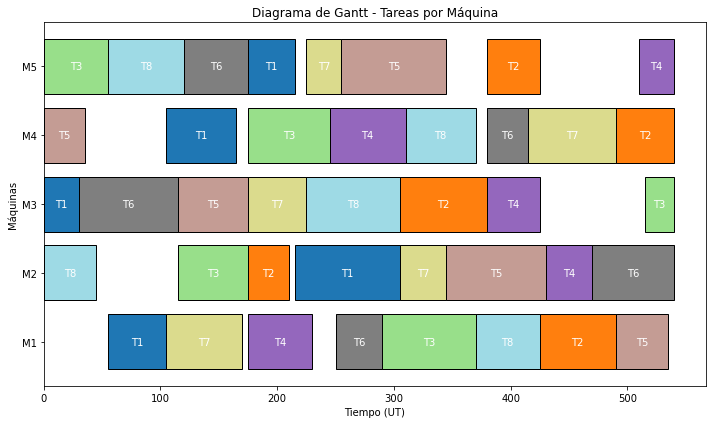

In [7]:
def graficar_gantt(tiempos_procesamiento, num_maquinas, num_tareas):
    """
    Argumentos:
    tiempos_procesamiento : Lista de listas donde las filas son tareas y las columnas son máquinas, contiene el tiempo de procesamiento de la tarea i en la máquina j.
    num_maquinas; Número total de máquinas
    num_tareas; Número total de tareas
    """
    tiempos_inicio = [[] for _ in range(num_maquinas)] # hacemos una matriz que entrega por máquina, cuál es el tiempo de inicio de cada tarea
    for j in range(num_tareas): 
        for i in range(num_maquinas):
            tiempos_inicio[i].append(x[j][i].x)

    fig, ax = plt.subplots(figsize=(10, 6))

    colores = plt.cm.get_cmap('tab20', num_tareas)
    
    # Recorrer cada máquina y mostrar las tareas asignadas en el tiempo
    for maquina in range(num_maquinas):
        for tarea in range(num_tareas):
            inicio_tarea = tiempos_inicio[maquina][tarea]
            duracion_tarea = tiempos_procesamiento[tarea][maquina]
            
            if duracion_tarea > 0:  # Evitamos errores si la tarea no tiene duración
                ax.barh(maquina, duracion_tarea, left=inicio_tarea, color=colores(tarea), edgecolor='black')
                #etiqueta
                ax.text(inicio_tarea + duracion_tarea / 2, maquina, f"T{tarea+1}", 
                        ha='center', va='center', color='white', fontsize=10)
    
    ax.set_xlabel('Tiempo (UT)')
    ax.set_ylabel('Máquinas')
    ax.set_yticks(range(num_maquinas))
    ax.set_yticklabels([f"M{m+1}" for m in range(num_maquinas)])
    ax.set_title('Diagrama de Gantt - Tareas por Máquina')
    
    plt.tight_layout()
    plt.show()

graficar_gantt(p_ij, M, J)